# Arabic Tweets Dataset Analysis

This notebook explores the Arabic Tweets dataset from HuggingFace. We'll load the data, perform exploratory data analysis, and extract useful features from the tweet text.

## 1. Setup and Data Loading

In [1]:
from datasets import load_dataset
import pandas as pd


/opt/anaconda3/envs/masters/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# # Download dataset from HuggingFace (commented out - CSV file is used instead)
# num_samples_to_take = 50000
# dataset_name = "pain/Arabic-Tweets"
# ds = load_dataset(dataset_name, split="train", streaming=True)
# ds = ds.take(num_samples_to_take)
# # Save to CSV
# df = pd.DataFrame(ds)
# df.to_csv('datasets/arabic_tweets_50k.csv', index=False)

**Note:** The dataset has been saved to CSV. The download cell above is now commented out to avoid re-downloading.

In [3]:
# Load dataset from CSV file

csv_path = 'datasets/arabic_tweets_50k.csv'
df = pd.read_csv(csv_path)
print(f"Dataset loaded from {csv_path}")
print(f"Shape: {df.shape}")

Dataset loaded from datasets/arabic_tweets_50k.csv
Shape: (50000, 1)


In [4]:
df.shape

(50000, 1)

In [5]:
df.head()


,text
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...
2,معروفه اننا بنتزنق في اخر اسبوع من المديول
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...


## 2. Basic Exploration

Let's examine the structure and content of our dataset.

In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Missing values:
text    0
dtype: int64

Total rows: 50000
Columns: ['text']


In [7]:
# Display sample tweets
print("Sample tweets:")
for i, tweet in enumerate(df['text'].head(10), 1):
    print(f"{i}. {tweet}")

Sample tweets:
1. مذاكره اخر اختبار هي اصعب شي امر فيه حاليا
2. باريللا صارله كم مباراه مستواه سيء فيدال بس يضرب بروزو مزاجه زي الزفت اخر كم مباراه وسط عقيم جدا
3. معروفه اننا بنتزنق في اخر اسبوع من المديول
4. حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحليل قوي جدا حساب العام والله
5. دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل النجعي مكان الخيبري الي كل كوره غلط ورائد اخر ربع ساعه مكان العبيد
6. اللهك اخر حاجه كتبتها
7. اي حد خالطني اخر اسبوعين يروح يحلل لان مبقيتش حاسس بطعم الدنيا
8. مكانتش اخر مره عملتها بس دي كانت اغربهم
9. ليفربول يفشل في الفوز في اخر خمس مباريات بالدوري الانجليزي ضد بيرنلي ضد مانشستر يونايتد ضد ساوثهامبتون ضد نيوكاسل ضد وست بروميتش البيون بدون اى هدف عام حتى الان
10. كنت انتظر ساعه عند كوفي يدخلني اخر شيء شفت الاسعار وطلعت


## 3. Feature Engineering

Extract basic features needed for data cleaning.

In [8]:
import re

# Text length features (needed for cleaning)
df['char_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Basic features extracted!")
print(f"Character count range: {df['char_count'].min()} - {df['char_count'].max()}")
print(f"Word count range: {df['word_count'].min()} - {df['word_count'].max()}")

Basic features extracted!
Character count range: 3 - 280
Word count range: 1 - 65


## 4. Data Cleaning

Now that we have the basic features, let's clean the data.

### Data Cleaning - Remove Short Tweets

Filter out very short tweets that may not contain meaningful content.

In [9]:
# Check distribution before filtering
print("Before filtering:")
print(f"Total tweets: {len(df)}")
print(f"Min char count: {df['char_count'].min()}")
print(f"Tweets with < 10 chars: {(df['char_count'] < 10).sum()}")
print(f"Tweets with < 20 chars: {(df['char_count'] < 20).sum()}")

# Filter out very short tweets (less than 15 characters)
min_length = 15
df_filtered = df[df['char_count'] >= min_length].copy()

print(f"\nAfter filtering (min {min_length} chars):")
print(f"Total tweets: {len(df_filtered)}")
print(f"Removed: {len(df) - len(df_filtered)} tweets ({(len(df) - len(df_filtered))/len(df)*100:.2f}%)")

# Update the main dataframe
df = df_filtered
df.reset_index(drop=True, inplace=True)
print(f"\nDataset shape: {df.shape}")

Before filtering:
Total tweets: 50000
Min char count: 3
Tweets with < 10 chars: 169
Tweets with < 20 chars: 3312

After filtering (min 15 chars):
Total tweets: 48856
Removed: 1144 tweets (2.29%)

Dataset shape: (48856, 3)


### Additional Data Cleaning

Apply additional cleaning steps to improve data quality.

In [10]:
import re

print(f"Starting with {len(df)} tweets")

# 1. Remove duplicate tweets
df_before_dedup = len(df)
df = df.drop_duplicates(subset=['text'], keep='first')
df.reset_index(drop=True, inplace=True)
print(f"\nRemoved {df_before_dedup - len(df)} duplicate tweets")

# 2. Remove tweets that are only whitespace
df_before_whitespace = len(df)
df['text'] = df['text'].str.strip()
df = df[df['text'].str.len() > 0]
df.reset_index(drop=True, inplace=True)
print(f"Removed {df_before_whitespace - len(df)} whitespace-only tweets")

# 3. Remove tweets with excessive repeated characters (spam-like)
def has_excessive_repetition(text, max_repeat=5):
    # Check for any character repeated more than max_repeat times
    pattern = r'(.)\1{' + str(max_repeat) + ',}'
    return bool(re.search(pattern, text))

df_before_spam = len(df)
df = df[~df['text'].apply(has_excessive_repetition)]
df.reset_index(drop=True, inplace=True)
print(f"Removed {df_before_spam - len(df)} spam-like tweets")

print(f"\nFinal dataset: {len(df)} tweets")
print(f"Total removed: {df_before_dedup - len(df)} tweets ({(df_before_dedup - len(df))/df_before_dedup*100:.2f}%)")

Starting with 48856 tweets

Removed 0 duplicate tweets
Removed 0 whitespace-only tweets
Removed 0 spam-like tweets

Final dataset: 48856 tweets
Total removed: 0 tweets (0.00%)
Removed 0 spam-like tweets

Final dataset: 48856 tweets
Total removed: 0 tweets (0.00%)


### Save Cleaned Dataset

Save the cleaned data to a new CSV file.

In [11]:
# Save cleaned dataset to CSV with all features
cleaned_csv_path = 'datasets/arabic_tweets_cleaned.csv'

# Save the entire dataframe with all features
df.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_csv_path}")
print(f"Total tweets in cleaned dataset: {len(df)}")
print(f"Total features saved: {len(df.columns)}")
print(f"Features: {df.columns.tolist()}")
print(f"File size: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

Cleaned dataset saved to: datasets/arabic_tweets_cleaned.csv
Total tweets in cleaned dataset: 48856
Total features saved: 3
Features: ['text', 'char_count', 'word_count']
File size: 12700.62 KB


## 5. Additional Feature Engineering

Extract more detailed features from the tweet text.

In [12]:
# Note: char_count and word_count already created earlier

# Extract mentions, hashtags, and URLs
df['mention_count'] = df['text'].apply(lambda x: len(re.findall(r'@\w+', x)))
df['hashtag_count'] = df['text'].apply(lambda x: len(re.findall(r'#\w+', x)))
df['url_count'] = df['text'].apply(lambda x: len(re.findall(r'http\S+|www\.\S+', x)))

# Check for Arabic numerals
df['has_numbers'] = df['text'].str.contains(r'\d', regex=True)

# Approximate word density (chars per word)
df['char_per_word'] = df['char_count'] / df['word_count'].replace(0, 1)

print("Additional features extracted successfully!")
df[['text', 'char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count']].head()

Additional features extracted successfully!


,text,char_count,word_count,mention_count,hashtag_count,url_count
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,42,9,0,0,0
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...,96,19,0,0,0
2,معروفه اننا بنتزنق في اخر اسبوع من المديول,42,8,0,0,0
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...,72,14,0,0,0
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...,112,22,0,0,0


### More Text Features

Extract additional linguistic and structural features.

In [21]:
# Whitespace and structure features
df['space_count'] = df['text'].str.count(' ')
df['newline_count'] = df['text'].str.count('\n')
df['tab_count'] = df['text'].str.count('\t')

# Arabic-specific character features
df['arabic_char_count'] = df['text'].apply(lambda x: len(re.findall(r'[\u0600-\u06FF]', x)))
df['arabic_letter_count'] = df['text'].apply(lambda x: len(re.findall(r'[\u0621-\u064A]', x)))  # Only Arabic letters
df['arabic_diacritics_count'] = df['text'].apply(lambda x: len(re.findall(r'[\u064B-\u0652]', x)))  # Diacritics (Tashkeel)

# Latin and digit characters
df['latin_char_count'] = df['text'].apply(lambda x: len(re.findall(r'[a-zA-Z]', x)))
df['digit_count'] = df['text'].apply(lambda x: len(re.findall(r'\d', x)))

# Character composition ratios
df['arabic_ratio'] = df['arabic_char_count'] / df['char_count'].replace(0, 1)
df['latin_ratio'] = df['latin_char_count'] / df['char_count'].replace(0, 1)
df['digit_ratio'] = df['digit_count'] / df['char_count'].replace(0, 1)

# Special patterns
df['ellipsis_count'] = df['text'].str.count('…|\\.\\.\\.+')  # Multiple dots
df['repeated_chars'] = df['text'].apply(lambda x: len(re.findall(r'(.)\1{2,}', x)))  # Character repetition (elongation)
df['consecutive_spaces'] = df['text'].str.count('  +')  # Multiple consecutive spaces

# Sentence structure
df['sentence_count'] = df['text'].apply(lambda x: max(1, len([s for s in re.split(r'[.!?؟]', x) if s.strip()])))
df['avg_words_per_sentence'] = df['word_count'] / df['sentence_count']

# Word-level features
df['unique_words'] = df['text'].apply(lambda x: len(set(x.split())))
df['lexical_diversity'] = df['unique_words'] / df['word_count'].replace(0, 1)
df['avg_word_length'] = df['char_count'] / df['word_count'].replace(0, 1)

# Uppercase features (for Latin text)
df['uppercase_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))
df['all_caps_words'] = df['text'].apply(lambda x: len([w for w in x.split() if w.isupper() and len(w) > 1]))
df['uppercase_ratio'] = df['uppercase_count'] / df['latin_char_count'].replace(0, 1)

# Mixed language detection
df['is_mixed_lang'] = (df['arabic_char_count'] > 0) & (df['latin_char_count'] > 0)

print("Extended features extracted!")
print(f"\nNew features added: {len(df.columns) - 21}")  # Previous had 21 features
print(f"Total features: {len(df.columns)}")
print(f"\nNew feature categories:")
print("  - Whitespace: space_count, newline_count, tab_count, consecutive_spaces")
print("  - Arabic-specific: arabic_char_count, arabic_letter_count, arabic_diacritics_count")
print("  - Character composition: latin_char_count, digit_count, ratios")
print("  - Text patterns: ellipsis_count, repeated_chars")
print("  - Structure: sentence_count, avg_words_per_sentence")
print("  - Lexical: unique_words, lexical_diversity, avg_word_length")
print("  - Uppercase: uppercase_count, all_caps_words, uppercase_ratio")
print("  - Language: is_mixed_lang")

Extended features extracted!

New features added: 16
Total features: 37

New feature categories:
  - Whitespace: space_count, newline_count, tab_count, consecutive_spaces
  - Arabic-specific: arabic_char_count, arabic_letter_count, arabic_diacritics_count
  - Character composition: latin_char_count, digit_count, ratios
  - Text patterns: ellipsis_count, repeated_chars
  - Structure: sentence_count, avg_words_per_sentence
  - Lexical: unique_words, lexical_diversity, avg_word_length
  - Uppercase: uppercase_count, all_caps_words, uppercase_ratio
  - Language: is_mixed_lang


### Word Cloud Visualizations

Explore the most common words and patterns in the Arabic tweets.

In [22]:
# Install wordcloud if not available
try:
    from wordcloud import WordCloud
except ImportError:
    import sys
    !{sys.executable} -m pip install wordcloud
    from wordcloud import WordCloud

print("WordCloud library loaded successfully!")

WordCloud library loaded successfully!


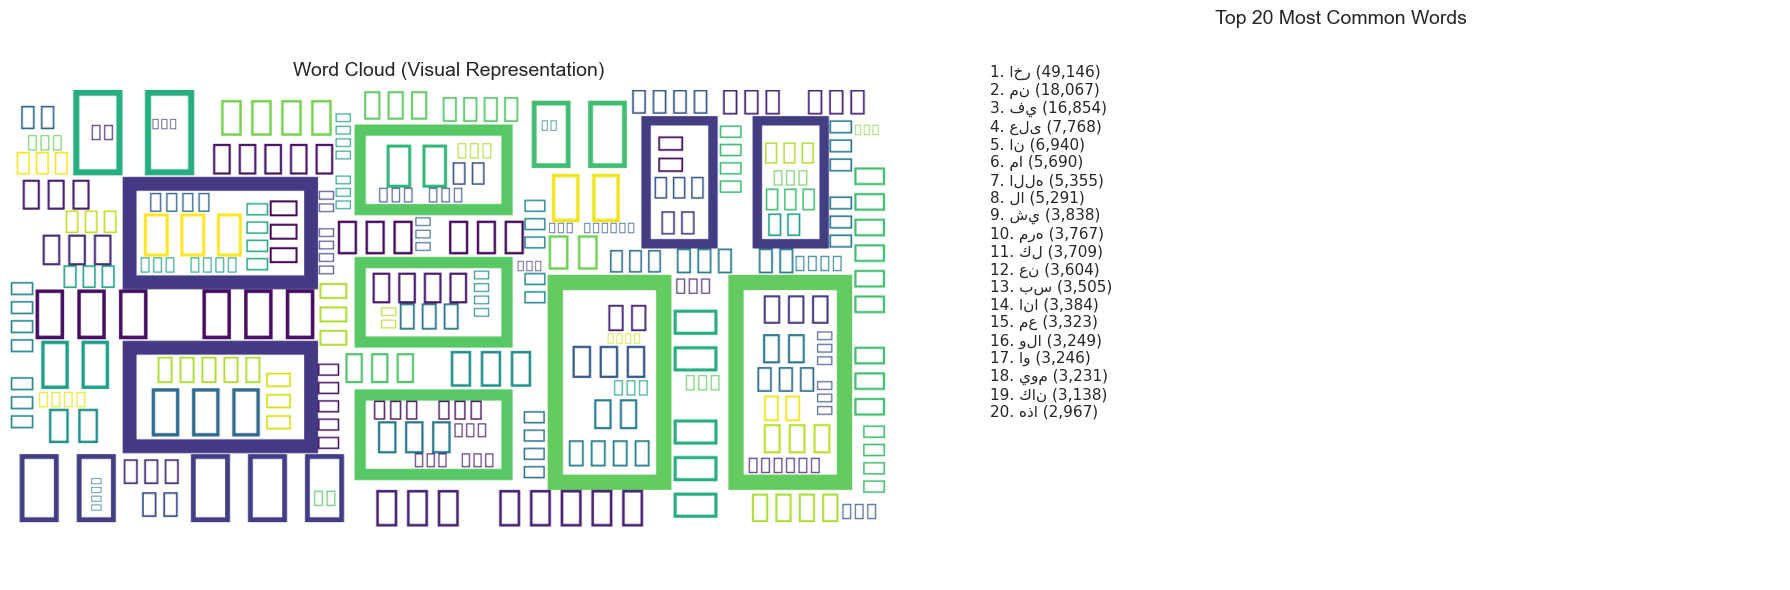

Total unique words in corpus: 115,270


In [30]:
# Combine all text for word cloud
all_text = ' '.join(df['text'].astype(str))

# Create word cloud with Arabic support using matplotlib
# Word clouds work but may show boxes - we'll also show top words as text
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10,
    font_path=None,  # System will try to use default fonts
    regexp=r"[\w']+"  # Include Arabic characters
).generate(all_text)

# Display word cloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Word cloud visualization
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Word Cloud (Visual Representation)', fontsize=14, pad=10)

# Top 20 words as text (this will show Arabic properly)
from collections import Counter
words_list = all_text.split()
word_counts = Counter(words_list).most_common(20)
words_text = '\n'.join([f"{i+1}. {word} ({count:,})" for i, (word, count) in enumerate(word_counts)])

ax2.text(0.1, 0.95, words_text, transform=ax2.transAxes, 
         fontsize=11, verticalalignment='top', family='DejaVu Sans')
ax2.axis('off')
ax2.set_title('Top 20 Most Common Words', fontsize=14, pad=10)

plt.tight_layout()
plt.show()

print(f"Total unique words in corpus: {len(set(all_text.split())):,}")

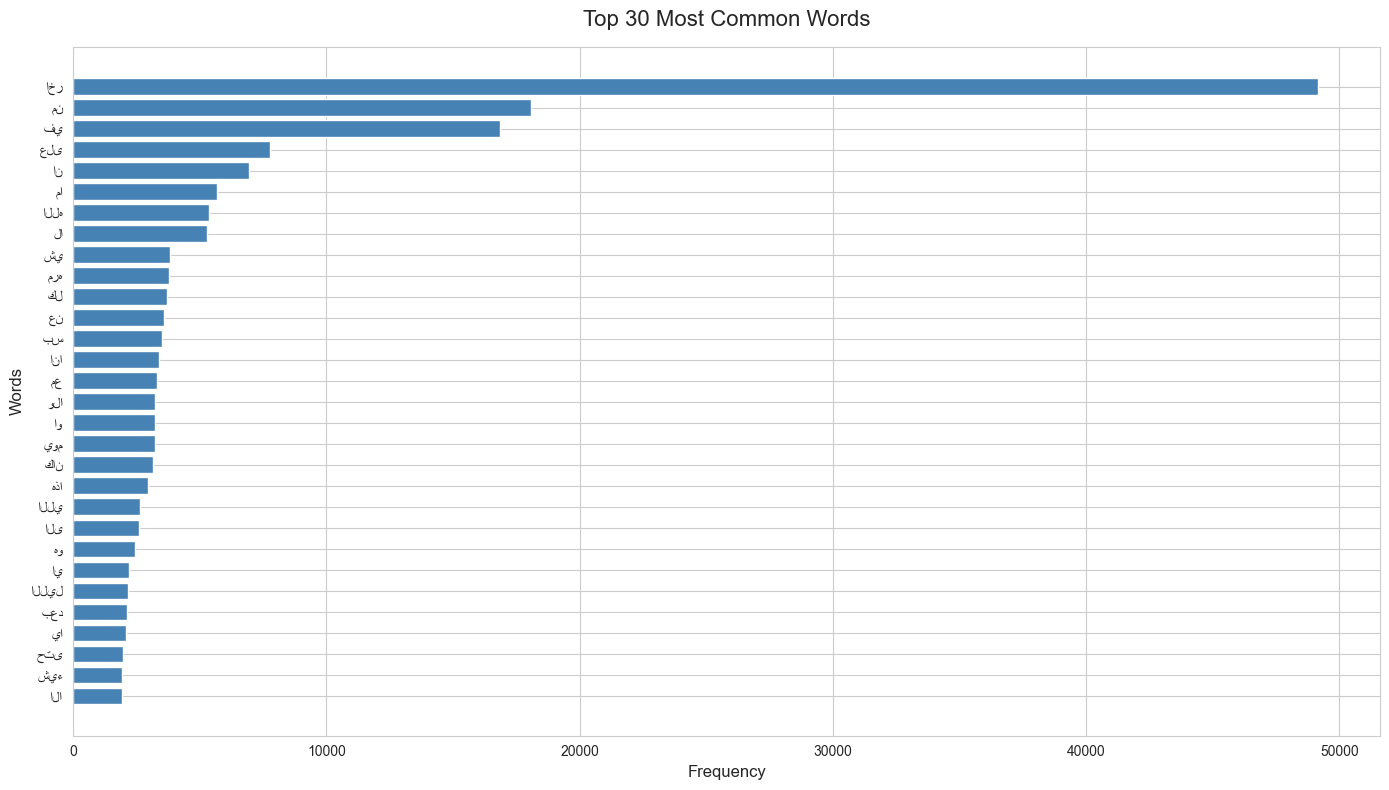

Top 10 most common words:
  'اخر': 49,146 times (5.71% of all words)
  'من': 18,067 times (2.10% of all words)
  'في': 16,854 times (1.96% of all words)
  'على': 7,768 times (0.90% of all words)
  'ان': 6,940 times (0.81% of all words)
  'ما': 5,690 times (0.66% of all words)
  'الله': 5,355 times (0.62% of all words)
  'لا': 5,291 times (0.61% of all words)
  'شي': 3,838 times (0.45% of all words)
  'مره': 3,767 times (0.44% of all words)


In [24]:
# Word frequency analysis
from collections import Counter

# Get all words
all_words = []
for text in df['text']:
    all_words.extend(str(text).split())

# Count word frequencies
word_freq = Counter(all_words)
most_common = word_freq.most_common(30)

# Create bar chart of top 30 words
words, counts = zip(*most_common)
plt.figure(figsize=(14, 8))
plt.barh(range(len(words)), counts, color='steelblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 30 Most Common Words', fontsize=16, pad=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Top 10 most common words:")
for word, count in most_common[:10]:
    print(f"  '{word}': {count:,} times ({count/len(all_words)*100:.2f}% of all words)")

Top 15 words per length category:

Short (0-50) (19,124 tweets):
  1. اخر: 18,860
  2. من: 2,015
  3. في: 1,824
  4. مره: 1,623
  5. شي: 1,408

Medium (50-100) (13,660 tweets):
  1. اخر: 13,664
  2. من: 3,702
  3. في: 3,563
  4. على: 1,556
  5. ما: 1,358

Long (100-200) (10,001 tweets):
  1. اخر: 10,249
  2. من: 5,864
  3. في: 5,598
  4. على: 2,551
  5. ان: 2,354

Very Long (200+) (6,071 tweets):
  1. من: 6,486
  2. اخر: 6,373
  3. في: 5,869
  4. ان: 2,965
  5. على: 2,852


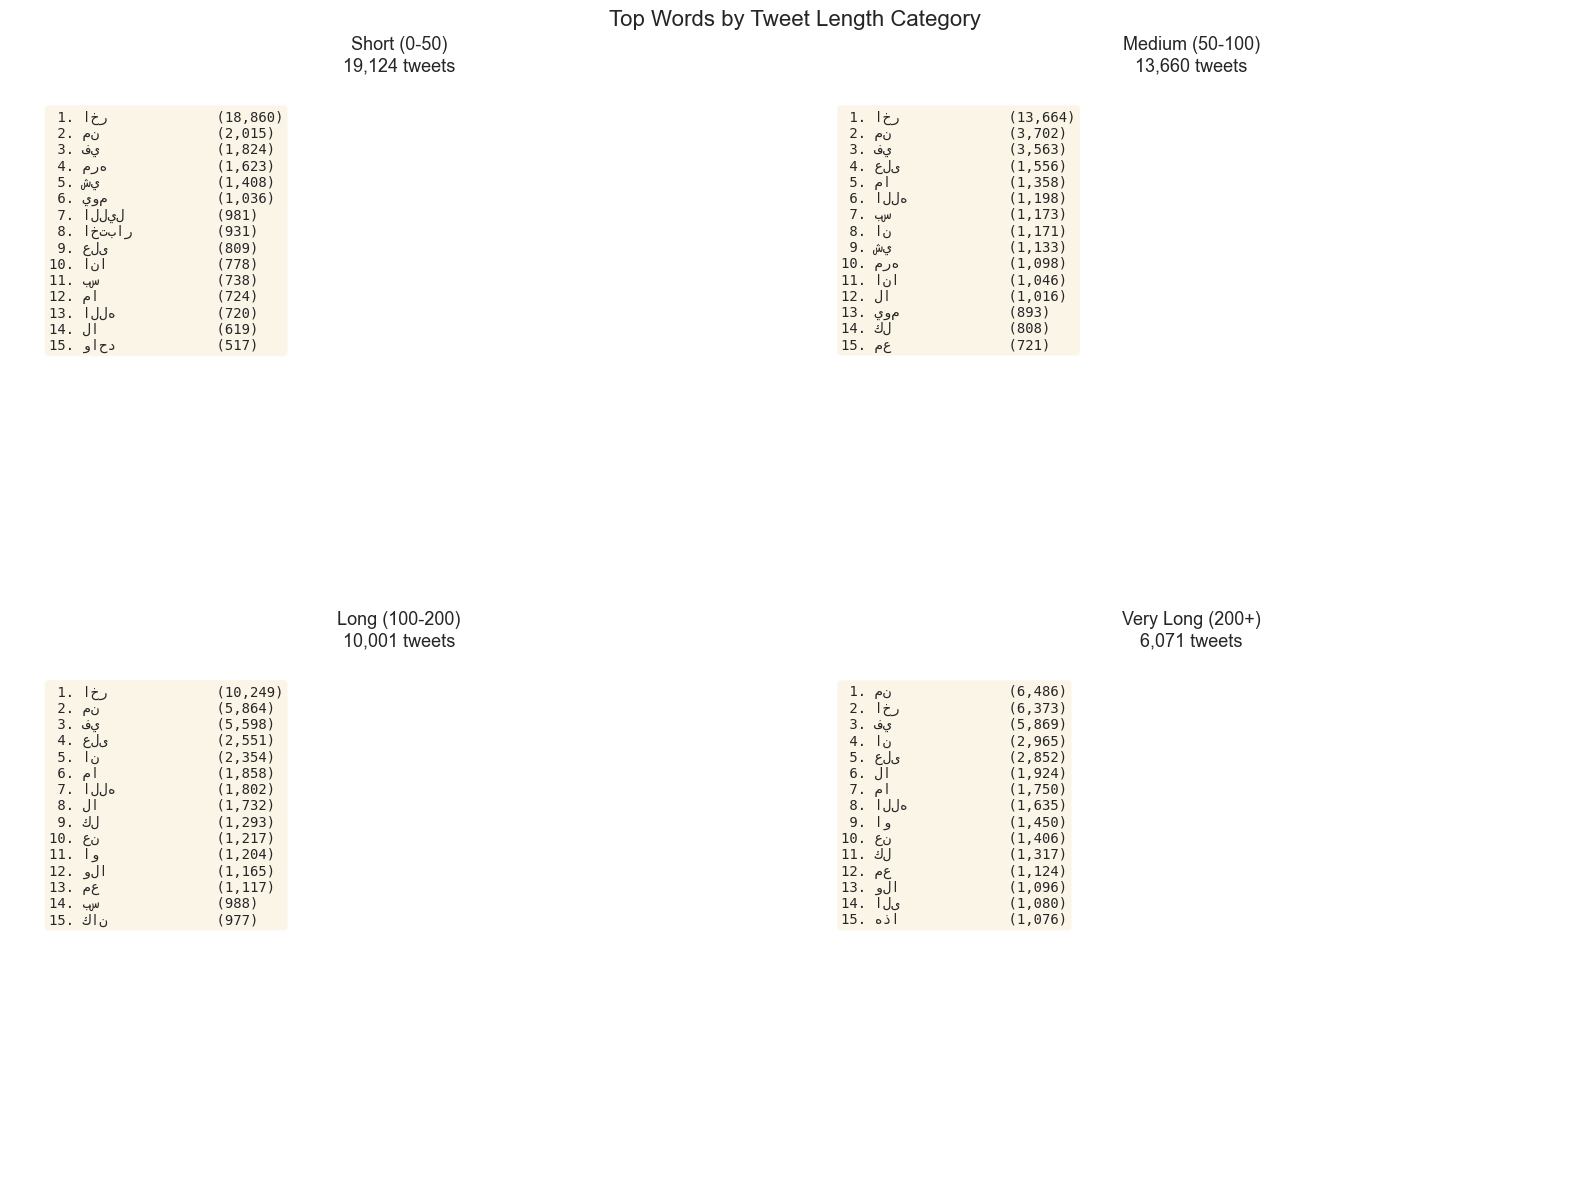



Tweets per length category:
length_category
Short (0-50)        19124
Medium (50-100)     13660
Long (100-200)      10001
Very Long (200+)     6071
Name: count, dtype: int64


In [31]:
# Word frequency analysis by tweet length categories
# Use the existing length_category column or create if needed
if 'length_category' not in df.columns:
    df['length_category'] = pd.cut(df['char_count'], 
                                    bins=[0, 50, 100, 200, float('inf')],
                                    labels=['Short (0-50)', 'Medium (50-100)', 'Long (100-200)', 'Very Long (200+)'])

print("Top 15 words per length category:\n" + "="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
categories = ['Short (0-50)', 'Medium (50-100)', 'Long (100-200)', 'Very Long (200+)']

for idx, (ax, category) in enumerate(zip(axes.flat, categories)):
    # Get tweets for this category
    category_tweets = df[df['length_category'] == category]['text']
    
    if len(category_tweets) > 0:
        # Get word frequencies for this category
        category_words = ' '.join(category_tweets.astype(str)).split()
        category_word_freq = Counter(category_words).most_common(15)
        
        # Display as text on the plot
        words_text = '\n'.join([f"{i+1:2d}. {word:15s} ({count:,})" 
                                for i, (word, count) in enumerate(category_word_freq)])
        
        ax.text(0.05, 0.95, words_text, transform=ax.transAxes, 
                fontsize=10, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
        ax.axis('off')
        ax.set_title(f'{category}\n{len(category_tweets):,} tweets', fontsize=13, pad=10)
        
        # Print to console as well
        print(f"\n{category} ({len(category_tweets):,} tweets):")
        for i, (word, count) in enumerate(category_word_freq[:5], 1):
            print(f"  {i}. {word}: {count:,}")

plt.suptitle('Top Words by Tweet Length Category', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("\nTweets per length category:")
print(df['length_category'].value_counts().sort_index())

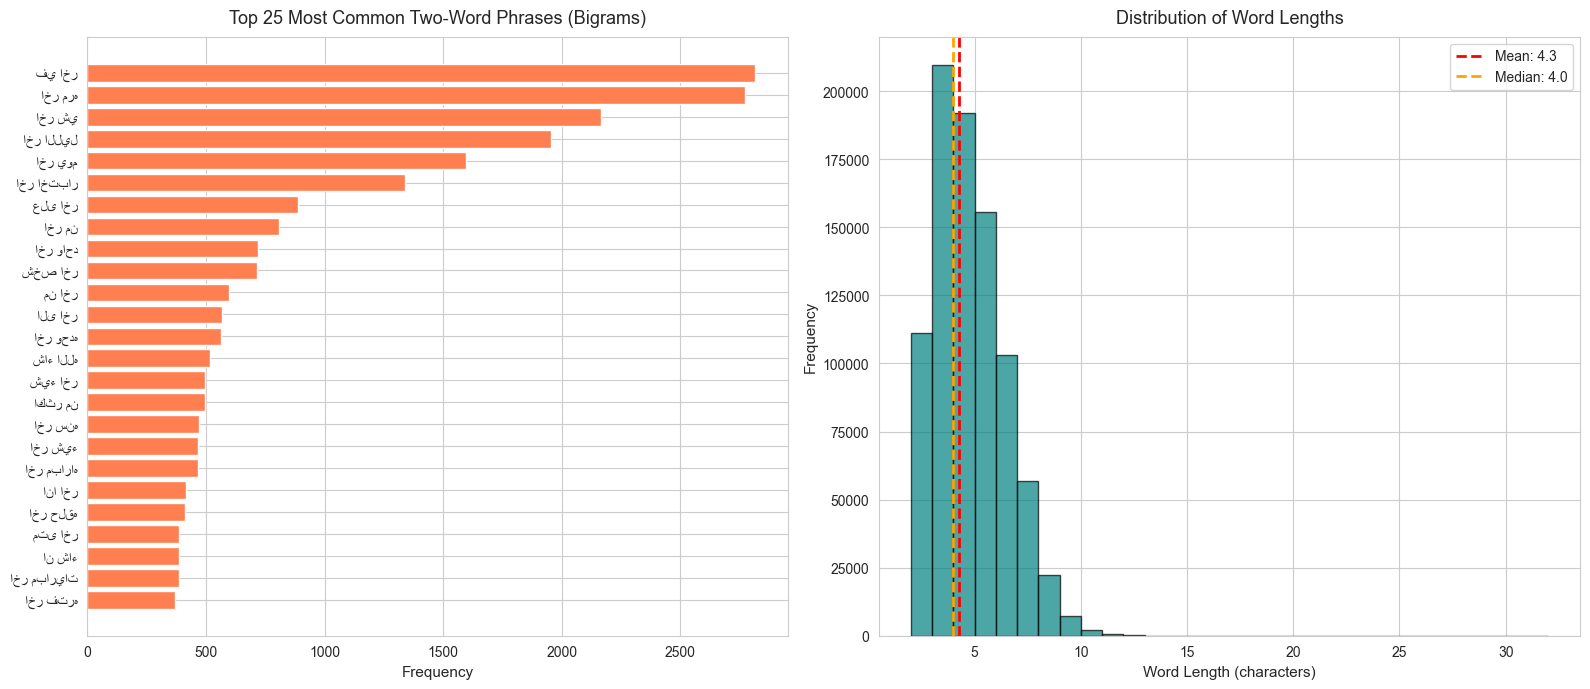


Bigram Statistics:
Total unique bigrams: 559,744
Total bigram occurrences: 811,932

Top 5 bigrams:
  'في اخر': 2,814 times
  'اخر مره': 2,773 times
  'اخر شي': 2,165 times
  'اخر الليل': 1,955 times
  'اخر يوم': 1,596 times


In [27]:
# Bigram (2-word phrase) analysis
from itertools import islice
import numpy as np

def get_bigrams(text):
    words = str(text).split()
    return [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]

# Get all bigrams
all_bigrams = []
for text in df['text']:
    all_bigrams.extend(get_bigrams(text))

# Count bigram frequencies
bigram_freq = Counter(all_bigrams)
top_bigrams = bigram_freq.most_common(25)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Top bigrams
bigrams, counts = zip(*top_bigrams)
ax1.barh(range(len(bigrams)), counts, color='coral')
ax1.set_yticks(range(len(bigrams)))
ax1.set_yticklabels(bigrams)
ax1.set_xlabel('Frequency', fontsize=11)
ax1.set_title('Top 25 Most Common Two-Word Phrases (Bigrams)', fontsize=13, pad=10)
ax1.invert_yaxis()

# Word length distribution
word_lengths = [len(word) for word in all_words]
ax2.hist(word_lengths, bins=30, color='teal', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Word Length (characters)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Word Lengths', fontsize=13, pad=10)
ax2.axvline(np.mean(word_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(word_lengths):.1f}')
ax2.axvline(np.median(word_lengths), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(word_lengths):.1f}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nBigram Statistics:")
print(f"Total unique bigrams: {len(bigram_freq):,}")
print(f"Total bigram occurrences: {sum(bigram_freq.values()):,}")
print(f"\nTop 5 bigrams:")
for bigram, count in top_bigrams[:5]:
    print(f"  '{bigram}': {count:,} times")

### Save Updated Dataset

Save the dataset with all extracted features to CSV.

In [28]:
# Save dataset with all features
updated_csv_path = 'datasets/arabic_tweets_cleaned.csv'
df.to_csv(updated_csv_path, index=False)

print(f"Dataset saved to: {updated_csv_path}")
print(f"\nFinal Dataset Summary:")
print(f"  Total tweets: {len(df):,}")
print(f"  Total features: {len(df.columns)}")
print(f"\nAll feature columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

Dataset saved to: datasets/arabic_tweets_cleaned.csv

Final Dataset Summary:
  Total tweets: 48,856
  Total features: 38

All feature columns:
   1. text
   2. char_count
   3. word_count
   4. mention_count
   5. hashtag_count
   6. url_count
   7. has_numbers
   8. char_per_word
   9. emoji_count
  10. punctuation_count
  11. exclamation_count
  12. question_count
  13. has_latin
  14. is_all_caps
  15. space_count
  16. newline_count
  17. tab_count
  18. arabic_char_count
  19. arabic_letter_count
  20. arabic_diacritics_count
  21. latin_char_count
  22. digit_count
  23. arabic_ratio
  24. latin_ratio
  25. digit_ratio
  26. ellipsis_count
  27. repeated_chars
  28. consecutive_spaces
  29. sentence_count
  30. avg_words_per_sentence
  31. unique_words
  32. lexical_diversity
  33. avg_word_length
  34. uppercase_count
  35. all_caps_words
  36. uppercase_ratio
  37. is_mixed_lang
  38. length_category


### Feature Engineering Summary

Overview of all extracted features and their categories.

In [29]:
# Feature categorization
feature_categories = {
    'Basic Text': ['char_count', 'word_count', 'sentence_count', 'avg_words_per_sentence'],
    'Social Media': ['mention_count', 'hashtag_count', 'url_count'],
    'Punctuation & Symbols': ['punctuation_count', 'exclamation_count', 'question_count', 
                              'emoji_count', 'ellipsis_count'],
    'Arabic-Specific': ['arabic_char_count', 'arabic_letter_count', 'arabic_diacritics_count',
                        'arabic_ratio', 'repeated_chars'],
    'Latin & Mixed': ['latin_char_count', 'latin_ratio', 'has_latin', 'is_mixed_lang',
                     'uppercase_count', 'all_caps_words', 'uppercase_ratio', 'is_all_caps'],
    'Numeric': ['digit_count', 'digit_ratio', 'has_numbers'],
    'Whitespace': ['space_count', 'newline_count', 'tab_count', 'consecutive_spaces'],
    'Lexical': ['unique_words', 'lexical_diversity', 'avg_word_length', 'char_per_word'],
    'Derived': ['length_category']
}

print("=" * 80)
print("COMPREHENSIVE FEATURE ENGINEERING SUMMARY")
print("=" * 80)
print(f"\nDataset: Arabic Tweets")
print(f"Total Samples: {len(df):,}")
print(f"Total Features: {len(df.columns)} ({len(df.columns) - 1} engineered features)")
print("\n" + "=" * 80)

for category, features in feature_categories.items():
    print(f"\n📊 {category} Features ({len(features)}):")
    for feature in features:
        if feature in df.columns:
            if df[feature].dtype in ['int64', 'float64']:
                mean_val = df[feature].mean()
                print(f"   • {feature:30s} (mean: {mean_val:.2f})")
            else:
                print(f"   • {feature:30s}")

print("\n" + "=" * 80)
print("WORD ANALYSIS INSIGHTS")
print("=" * 80)
print(f"• Total unique words in corpus: {len(set(all_text.split())):,}")
print(f"• Total unique bigrams: {len(bigram_freq):,}")
print(f"• Average word length: {np.mean([len(w) for w in all_text.split()]):.1f} characters")
print(f"• Most common word: '{most_common[0][0]}' ({most_common[0][1]:,} occurrences)")
print(f"• Most common bigram: '{top_bigrams[0][0]}' ({top_bigrams[0][1]:,} occurrences)")
print("=" * 80)

COMPREHENSIVE FEATURE ENGINEERING SUMMARY

Dataset: Arabic Tweets
Total Samples: 48,856
Total Features: 38 (37 engineered features)


📊 Basic Text Features (4):
   • char_count                     (mean: 92.10)
   • word_count                     (mean: 17.62)
   • sentence_count                 (mean: 1.00)
   • avg_words_per_sentence         (mean: 17.62)

📊 Social Media Features (3):
   • mention_count                  (mean: 0.00)
   • hashtag_count                  (mean: 0.00)
   • url_count                      (mean: 0.00)

📊 Punctuation & Symbols Features (5):
   • punctuation_count              (mean: 0.00)
   • exclamation_count              (mean: 0.00)
   • question_count                 (mean: 0.00)
   • emoji_count                    (mean: 0.00)
   • ellipsis_count                 (mean: 0.00)

📊 Arabic-Specific Features (5):
   • arabic_char_count              (mean: 75.48)
   • arabic_letter_count            (mean: 75.48)
   • arabic_diacritics_count        (mean: 0.0

## 9. Mental Health Classification

Load and integrate the mental health classifications from OpenAI Batch API results.

In [32]:
import json
import glob
import os

# Load all batch output files
batch_output_dir = 'batches/'
output_files = sorted(glob.glob(os.path.join(batch_output_dir, 'batch_output_*.jsonl')))

print(f"Found {len(output_files)} batch output files")
print("="*70)

# Collect all classifications
all_classifications = []

for output_file in output_files:
    batch_num = output_file.split('_')[-1].replace('.jsonl', '')
    
    with open(output_file, 'r') as f:
        lines = f.readlines()
        
    classifications = []
    for line in lines:
        try:
            result = json.loads(line)
            custom_id = result['custom_id']
            request_index = int(custom_id.split('-')[-1])
            
            # Extract classification from response
            if result['response']['status_code'] == 200:
                classification = result['response']['body']['choices'][0]['message']['content'].strip()
                classifications.append({
                    'request_index': request_index,
                    'classification': classification,
                    'batch': batch_num
                })
        except Exception as e:
            print(f"Error processing line in {output_file}: {e}")
            continue
    
    all_classifications.extend(classifications)
    print(f"Batch {batch_num}: {len(classifications):,} classifications loaded")

print("="*70)
print(f"\nTotal classifications loaded: {len(all_classifications):,}")

# Create a dataframe from classifications
classifications_df = pd.DataFrame(all_classifications)
classifications_df = classifications_df.sort_values('request_index').reset_index(drop=True)

print(f"\nClassification distribution:")
print(classifications_df['classification'].value_counts())

Found 10 batch output files
Batch 1: 5,000 classifications loaded
Batch 10: 3,856 classifications loaded
Batch 2: 5,000 classifications loaded
Batch 3: 5,000 classifications loaded
Batch 4: 5,000 classifications loaded
Batch 5: 5,000 classifications loaded
Batch 6: 5,000 classifications loaded
Batch 7: 5,000 classifications loaded
Batch 8: 5,000 classifications loaded
Batch 9: 5,000 classifications loaded

Total classifications loaded: 48,856

Classification distribution:
classification
neutral                    43299
depression                  3831
anxiety                     1005
suicidal_ideation            707
القلق                          5
محايد                          2
الاكتئاب                       2
الحياد                         1
الحالة النفسية: neutral        1
أنxiety                        1
التوتر                         1
عصبية                          1
Name: count, dtype: int64


In [33]:
# Clean up classifications - some responses are in Arabic or have variations
# Standardize all to the four expected categories
def standardize_classification(classification):
    classification = classification.lower().strip()
    
    # Map variations to standard categories
    if 'depression' in classification or 'اكتئاب' in classification:
        return 'depression'
    elif 'anxiety' in classification or 'قلق' in classification or 'توتر' in classification:
        return 'anxiety'
    elif 'suicidal' in classification or 'انتحار' in classification:
        return 'suicidal_ideation'
    else:
        return 'neutral'

# Apply standardization
classifications_df['classification'] = classifications_df['classification'].apply(standardize_classification)

print("Standardized classification distribution:")
print(classifications_df['classification'].value_counts())
print(f"\nTotal: {len(classifications_df):,}")

# Verify we have the right number
print(f"\nDataframe size: {len(df):,}")
print(f"Classifications size: {len(classifications_df):,}")
print(f"Match: {len(df) == len(classifications_df)}")

Standardized classification distribution:
classification
neutral              43305
depression            3833
anxiety               1011
suicidal_ideation      707
Name: count, dtype: int64

Total: 48,856

Dataframe size: 48,856
Classifications size: 48,856
Match: True


In [34]:
# Add classification column to the main dataframe
df['mental_health_classification'] = classifications_df['classification'].values

# Save the updated dataset with classifications
classified_csv_path = 'datasets/arabic_tweets_classified.csv'
df.to_csv(classified_csv_path, index=False)

print(f"✓ Classifications added to dataset")
print(f"✓ Saved to: {classified_csv_path}")
print(f"\nDataset Summary:")
print(f"  Total tweets: {len(df):,}")
print(f"  Total features: {len(df.columns)}")
print(f"  New column: mental_health_classification")
print(f"\nClassification breakdown:")
for category, count in df['mental_health_classification'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"  {category:20s}: {count:6,} ({percentage:5.2f}%)")

# Display sample
print(f"\nSample of classified tweets:")
df[['text', 'mental_health_classification']].head(10)

✓ Classifications added to dataset
✓ Saved to: datasets/arabic_tweets_classified.csv

Dataset Summary:
  Total tweets: 48,856
  Total features: 39
  New column: mental_health_classification

Classification breakdown:
  neutral             : 43,305 (88.64%)
  depression          :  3,833 ( 7.85%)
  anxiety             :  1,011 ( 2.07%)
  suicidal_ideation   :    707 ( 1.45%)

Sample of classified tweets:


,text,mental_health_classification
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,neutral
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...,neutral
2,معروفه اننا بنتزنق في اخر اسبوع من المديول,neutral
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...,neutral
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...,neutral
5,اللهك اخر حاجه كتبتها,neutral
6,اي حد خالطني اخر اسبوعين يروح يحلل لان مبقيتش ...,depression
7,مكانتش اخر مره عملتها بس دي كانت اغربهم,neutral
8,ليفربول يفشل في الفوز في اخر خمس مباريات بالدو...,neutral
9,كنت انتظر ساعه عند كوفي يدخلني اخر شيء شفت الا...,neutral


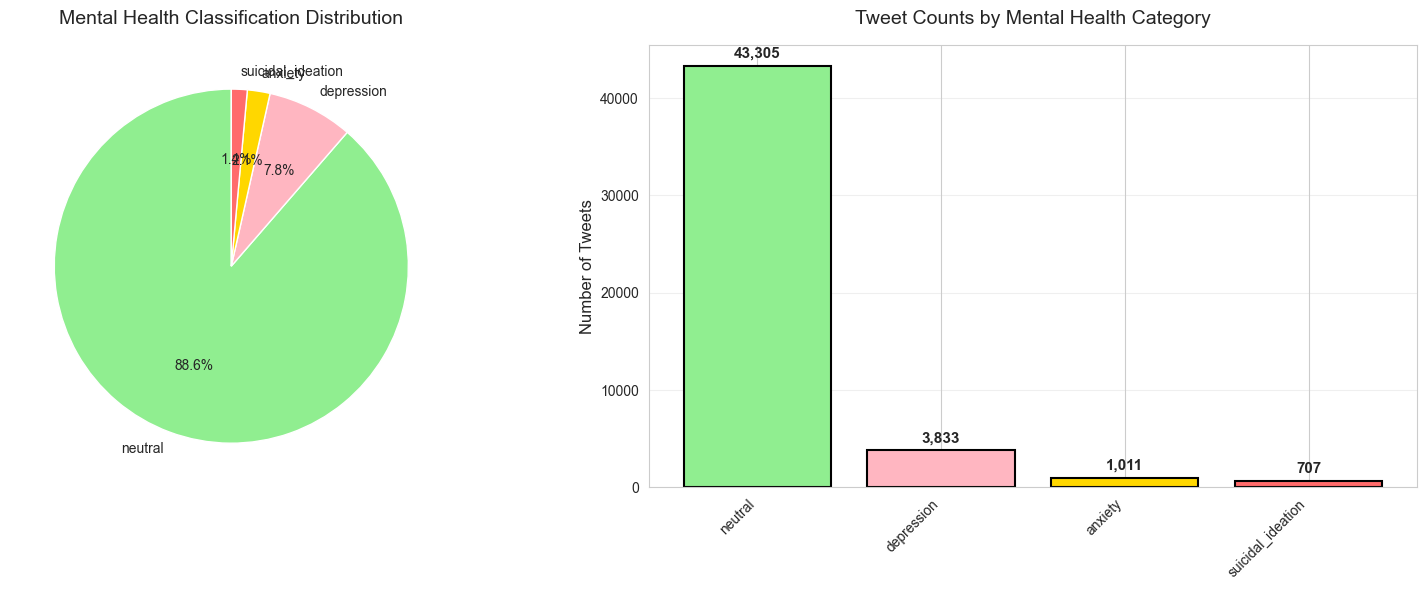


Key Statistics:
  Most common: neutral (43,305 tweets)
  Mental health concerns: 5,551 tweets (11.36%)


In [35]:
# Visualize classification distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
classification_counts = df['mental_health_classification'].value_counts()
colors = ['#90EE90', '#FFB6C1', '#FFD700', '#FF6B6B']
axes[0].pie(classification_counts.values, labels=classification_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[0].set_title('Mental Health Classification Distribution', fontsize=14, pad=15)

# Bar chart
axes[1].bar(range(len(classification_counts)), classification_counts.values, 
           color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(len(classification_counts)))
axes[1].set_xticklabels(classification_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Number of Tweets', fontsize=12)
axes[1].set_title('Tweet Counts by Mental Health Category', fontsize=14, pad=15)
axes[1].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(classification_counts.values):
    axes[1].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Statistics:")
print(f"  Most common: {classification_counts.index[0]} ({classification_counts.values[0]:,} tweets)")
print(f"  Mental health concerns: {len(df[df['mental_health_classification'] != 'neutral']):,} tweets ({len(df[df['mental_health_classification'] != 'neutral'])/len(df)*100:.2f}%)")

In [36]:
# Show sample tweets from each mental health category
print("="*80)
print("SAMPLE TWEETS BY MENTAL HEALTH CLASSIFICATION")
print("="*80)

categories = ['neutral', 'depression', 'anxiety', 'suicidal_ideation']
for category in categories:
    category_df = df[df['mental_health_classification'] == category]
    print(f"\n{category.upper()} ({len(category_df):,} tweets):")
    print("-" * 80)
    
    # Show 3 sample tweets
    samples = category_df.sample(min(3, len(category_df)))
    for idx, (i, row) in enumerate(samples.iterrows(), 1):
        tweet_text = row['text']
        if len(tweet_text) > 150:
            tweet_text = tweet_text[:150] + "..."
        print(f"{idx}. {tweet_text}")
    print()

print("="*80)

SAMPLE TWEETS BY MENTAL HEALTH CLASSIFICATION

NEUTRAL (43,305 tweets):
--------------------------------------------------------------------------------
1. بيكهيون اندر الفا اول الفيك اخر الفيك
2. ابداعات اخر الليل الفاشله
3. ونتابع اخر دقائق ديربي القصمان


DEPRESSION (3,833 tweets):
--------------------------------------------------------------------------------
1. انا قد اشتكيت وندمت صدق اخر مره افكر الصراحه
2. تفضفض الليل واذا جا الصباح ندمت نفسيه
3. اخر فرصه لنا ضاعت نكمل الاداء باحلامنا


ANXIETY (1,011 tweets):
--------------------------------------------------------------------------------
1. ان شاء الله توقعك في محله وان شاء الله مايخربونها بالاختبارات الحضوريه لانه لو جمعتهم اخر شيء فكانك ماسويت شيء وبينتشر بينهم المرض
2. توني شفت اخر حلقه نزلت بون بيس شايله هم سابو
3. ماذكر متى اخر مره مرضت والحين مدري شلون اتصرف شسوي


SUICIDAL_IDEATION (707 tweets):
--------------------------------------------------------------------------------
1. ثانيا ان رفضت طلبات الوكا الاربع مهما كان

## 6. Exploratory Data Analysis (EDA)

### 6.1 Statistical Summary

In [13]:
# Descriptive statistics for numerical features
df[['char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count', 'char_per_word']].describe()

,char_count,word_count,mention_count,hashtag_count,url_count,char_per_word
count,48856.00000,48856.000000,48856.0,48856.0,48856.0,48856.000000
mean,92.09835,17.618880,0.0,0.0,0.0,5.117885
std,72.44827,13.335421,0.0,0.0,0.0,0.537899
min,15.00000,2.000000,0.0,0.0,0.0,3.000000
25%,36.00000,7.000000,0.0,0.0,0.0,4.769231
50%,65.00000,13.000000,0.0,0.0,0.0,5.113208
75%,128.00000,24.000000,0.0,0.0,0.0,5.460000
max,280.00000,65.000000,0.0,0.0,0.0,9.250000


In [14]:
# Calculate percentages
total_tweets = len(df)
print(f"Tweets with mentions: {(df['mention_count'] > 0).sum()} ({(df['mention_count'] > 0).sum()/total_tweets*100:.2f}%)")
print(f"Tweets with hashtags: {(df['hashtag_count'] > 0).sum()} ({(df['hashtag_count'] > 0).sum()/total_tweets*100:.2f}%)")
print(f"Tweets with URLs: {(df['url_count'] > 0).sum()} ({(df['url_count'] > 0).sum()/total_tweets*100:.2f}%)")
print(f"Tweets with numbers: {df['has_numbers'].sum()} ({df['has_numbers'].sum()/total_tweets*100:.2f}%)")

Tweets with mentions: 0 (0.00%)
Tweets with hashtags: 0 (0.00%)
Tweets with URLs: 0 (0.00%)
Tweets with numbers: 0 (0.00%)


### 6.2 Visualizations

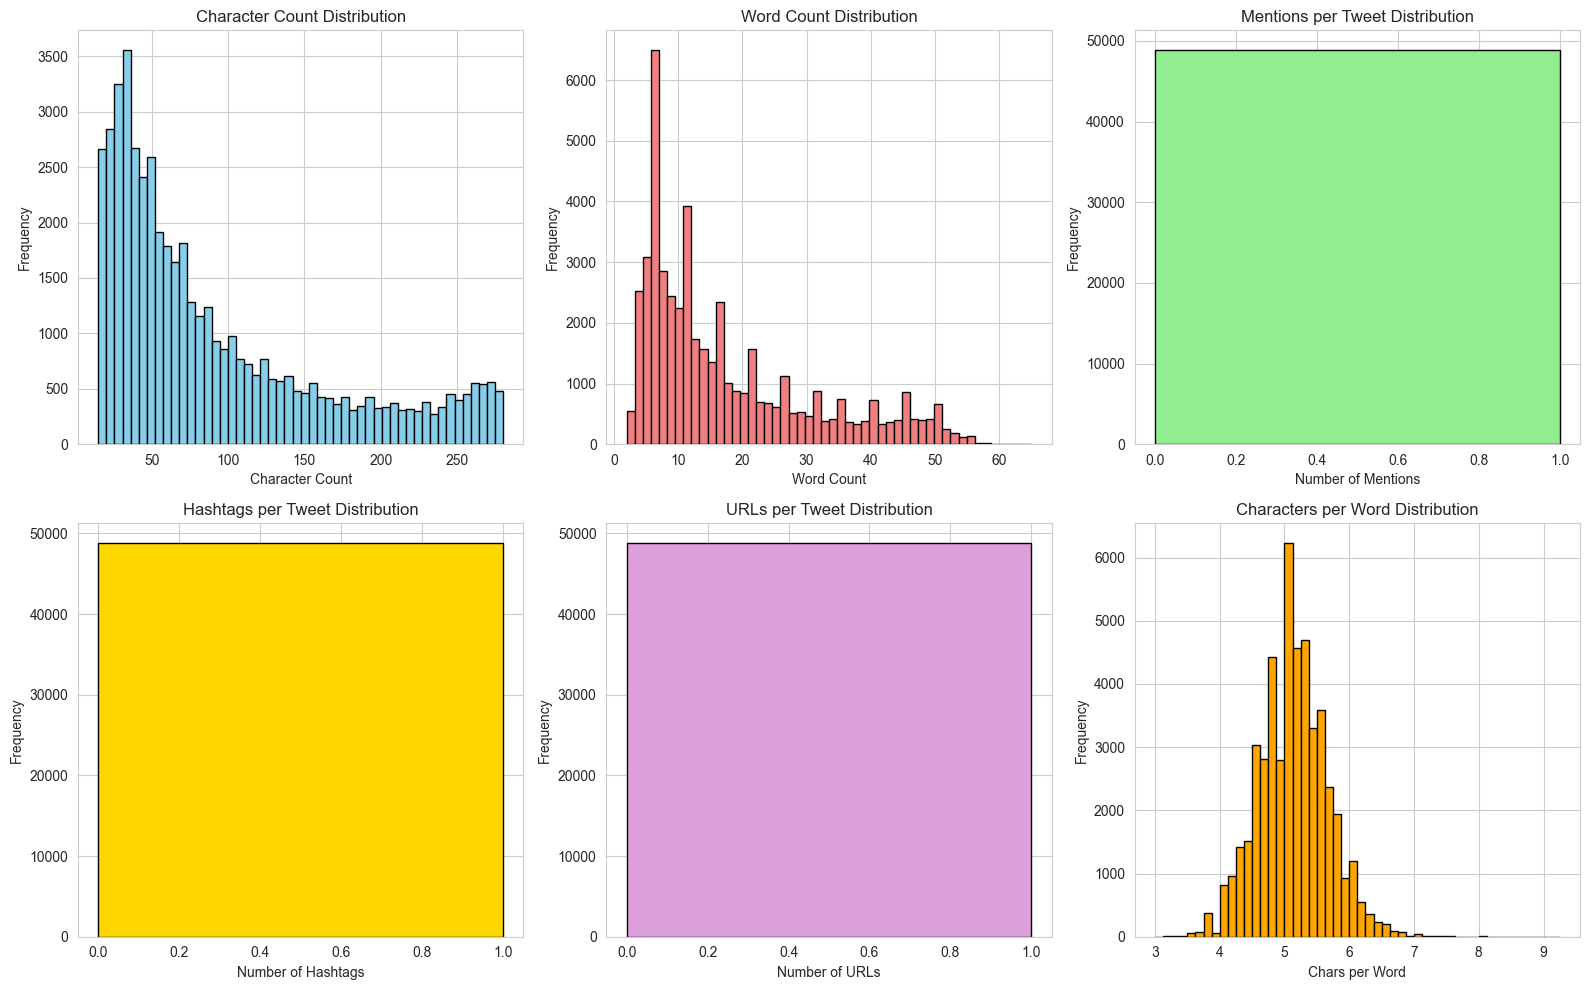

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Character count distribution
axes[0, 0].hist(df['char_count'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Character Count Distribution')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Mentions distribution
axes[0, 2].hist(df['mention_count'], bins=range(0, df['mention_count'].max()+2), color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Mentions per Tweet Distribution')
axes[0, 2].set_xlabel('Number of Mentions')
axes[0, 2].set_ylabel('Frequency')

# Hashtags distribution
axes[1, 0].hist(df['hashtag_count'], bins=range(0, df['hashtag_count'].max()+2), color='gold', edgecolor='black')
axes[1, 0].set_title('Hashtags per Tweet Distribution')
axes[1, 0].set_xlabel('Number of Hashtags')
axes[1, 0].set_ylabel('Frequency')

# URL distribution
axes[1, 1].hist(df['url_count'], bins=range(0, df['url_count'].max()+2), color='plum', edgecolor='black')
axes[1, 1].set_title('URLs per Tweet Distribution')
axes[1, 1].set_xlabel('Number of URLs')
axes[1, 1].set_ylabel('Frequency')

# Character per word distribution
axes[1, 2].hist(df['char_per_word'], bins=50, color='orange', edgecolor='black')
axes[1, 2].set_title('Characters per Word Distribution')
axes[1, 2].set_xlabel('Chars per Word')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

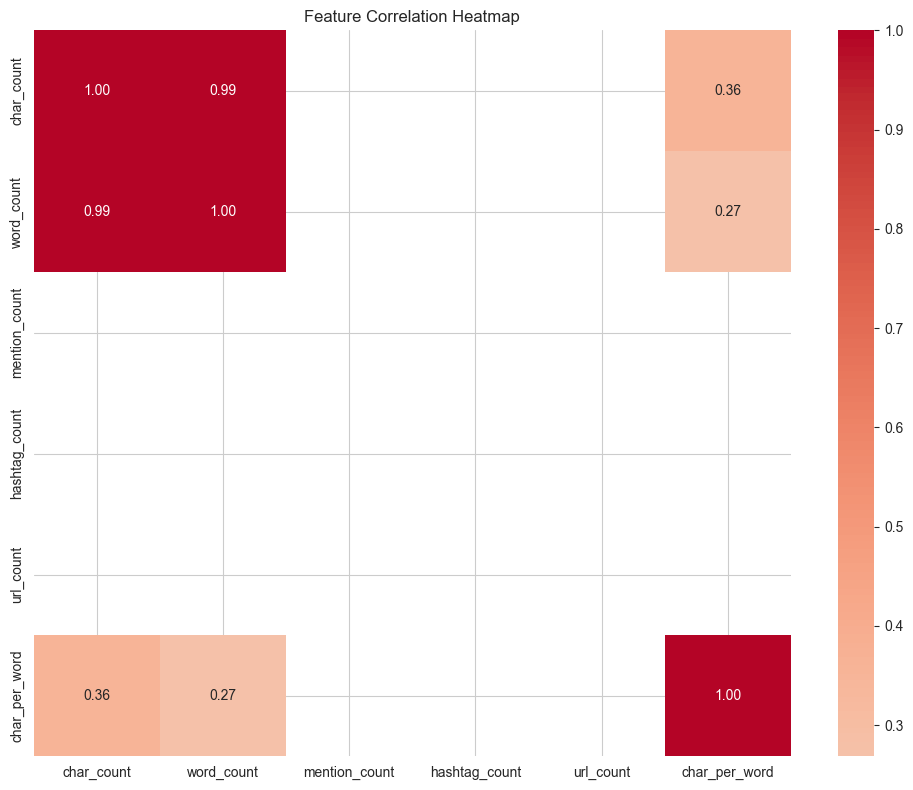

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_cols = ['char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count', 'char_per_word']
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### 6.3 Top Tweets Analysis

In [17]:
# Longest tweets
print("Top 5 Longest Tweets by Character Count:")
print("="*60)
for idx, row in df.nlargest(5, 'char_count')[['text', 'char_count', 'word_count']].iterrows():
    print(f"\nChars: {row['char_count']}, Words: {row['word_count']}")
    print(f"Text: {row['text'][:100]}...")
    
print("\n" + "="*60)
print("\nTop 5 Tweets with Most Mentions:")
print("="*60)
for idx, row in df.nlargest(5, 'mention_count')[['text', 'mention_count']].iterrows():
    print(f"\nMentions: {row['mention_count']}")
    print(f"Text: {row['text'][:100]}...")

Top 5 Longest Tweets by Character Count:

Chars: 280, Words: 53
Text: بالعكس ننتقد بدر اذا ظهر بمستوي موزين لكن مانشكك في ولائه للقادسيه ضد نادي معين هالشي مرفوض خاصه اذا...

Chars: 280, Words: 55
Text: تذكرت يوم اخوي علق في الحمام كان عمره خمس معرف كيف يفتح الباب وامي طالبه من وحده فطاير وكذا وانا نزل...

Chars: 280, Words: 56
Text: اخواني العبره في الخواتيم لايغرنكم احدكم انه على ورع وتقوى فما يدري الانسان عن خاتمته وكم من فاسق تا...

Chars: 280, Words: 58
Text: احب كل شيء جديد ما احب اي شيء مستعمل او مستخدم في الحياه لدرجه سياره كنت ابيها حيل لما رحت الوكاله ك...

Chars: 280, Words: 47
Text: تذكرت بزواج قرايبنا حضرت وحده مع بناتها وبنص الزواج فقدت بنتها الصغيره وقعدت تدورها وترسل بناتها يدو...


Top 5 Tweets with Most Mentions:

Mentions: 0
Text: مذاكره اخر اختبار هي اصعب شي امر فيه حاليا...

Mentions: 0
Text: باريللا صارله كم مباراه مستواه سيء فيدال بس يضرب بروزو مزاجه زي الزفت اخر كم مباراه وسط عقيم جدا...

Mentions: 0
Text: معروفه اننا بنتزنق في اخر اسبوع من المديول...

Mentions:

## 7. Advanced Text Features

Extract more advanced features like emojis, punctuation, and special characters.

In [18]:
# Count emojis (simplified check for common emoji ranges)
def count_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return len(emoji_pattern.findall(text))

df['emoji_count'] = df['text'].apply(count_emojis)

# Count punctuation
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in '!?,.:;…']))

# Count exclamation and question marks
df['exclamation_count'] = df['text'].str.count('!')
df['question_count'] = df['text'].str.count('؟|\\?')  # Arabic and English question marks

# Check if tweet is all caps (for Arabic, check Latin characters if any)
df['has_latin'] = df['text'].str.contains('[a-zA-Z]', regex=True)
df['is_all_caps'] = df.apply(lambda row: row['text'].upper() == row['text'] if row['has_latin'] else False, axis=1)

print("Additional features extracted!")
df[['text', 'emoji_count', 'punctuation_count', 'exclamation_count', 'question_count']].head(10)

Additional features extracted!


,text,emoji_count,punctuation_count,exclamation_count,question_count
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,0,0,0,0
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...,0,0,0,0
2,معروفه اننا بنتزنق في اخر اسبوع من المديول,0,0,0,0
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...,0,0,0,0
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...,0,0,0,0
5,اللهك اخر حاجه كتبتها,0,0,0,0
6,اي حد خالطني اخر اسبوعين يروح يحلل لان مبقيتش ...,0,0,0,0
7,مكانتش اخر مره عملتها بس دي كانت اغربهم,0,0,0,0
8,ليفربول يفشل في الفوز في اخر خمس مباريات بالدو...,0,0,0,0
9,كنت انتظر ساعه عند كوفي يدخلني اخر شيء شفت الا...,0,0,0,0


## 8. Summary Statistics

Final overview of all features in the dataset.

In [19]:
# Display complete feature set
print("Dataset Overview:")
print(f"Total tweets: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"\nFeature columns: {df.columns.tolist()}")
print("\n" + "="*60)
print("\nAll Features Summary:")
df.describe(include='all').T

Dataset Overview:
Total tweets: 48856
Total features: 14

Feature columns: ['text', 'char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count', 'has_numbers', 'char_per_word', 'emoji_count', 'punctuation_count', 'exclamation_count', 'question_count', 'has_latin', 'is_all_caps']


All Features Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,48856,48856,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
char_count,48856.0,NaN,NaN,NaN,92.09835,72.44827,15.0,36.0,65.0,128.0,280.0
word_count,48856.0,NaN,NaN,NaN,17.61888,13.335421,2.0,7.0,13.0,24.0,65.0
mention_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hashtag_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
url_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
has_numbers,48856,1,False,48856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
char_per_word,48856.0,NaN,NaN,NaN,5.117885,0.537899,3.0,4.769231,5.113208,5.46,9.25
emoji_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
punctuation_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Key insights
print("Key Insights from the Dataset:")
print("="*60)
print(f"Average tweet length: {df['char_count'].mean():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Average characters per word: {df['char_per_word'].mean():.2f}")
print(f"\nTweets with emojis: {(df['emoji_count'] > 0).sum()} ({(df['emoji_count'] > 0).sum()/len(df)*100:.2f}%)")
print(f"Tweets with exclamations: {(df['exclamation_count'] > 0).sum()} ({(df['exclamation_count'] > 0).sum()/len(df)*100:.2f}%)")
print(f"Tweets with questions: {(df['question_count'] > 0).sum()} ({(df['question_count'] > 0).sum()/len(df)*100:.2f}%)")
print(f"\nMost common tweet length: {df['char_count'].mode()[0]} characters")
print(f"Most common word count: {df['word_count'].mode()[0]} words")

Key Insights from the Dataset:
Average tweet length: 92.10 characters
Average word count: 17.62 words
Average characters per word: 5.12

Tweets with emojis: 0 (0.00%)
Tweets with exclamations: 0 (0.00%)
Tweets with questions: 0 (0.00%)

Most common tweet length: 28 characters
Most common word count: 6 words
